# ML Theory assignment Group 15
## Emma Brand, Ella Dengler, Diane Tambey

In [1]:
import matplotlib.pylab as plt 
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge

# 1. Loss functions

Lets focus on linear regression of the form 

$\mathbf{y} \approx f(\mathbf{X}) = \mathbf{X}\mathbf{w_1} + \mathbf{w_0}.$


#### 1.1 What are the rows of $\mathbf{X}$?

Each row of X corresponds to a single data point or observation. If X has the dimension nxm, then n is the number of observations.

#### 1.2 What are the columns of $\mathbf{X}$?

Each column of X corresponds to a specific feature across all data points. If X has the dimension nxm, then m is the number of specific features.

Often, we write the equation above as

$\mathbf{y} \approx \mathbf{\tilde{X}}\mathbf{w}$

#### 1.3 How does $\mathbf{\tilde{X}}$ look like in this case (i.e., how does the shape of the matrix change compared to $\mathbf{X}$)? (1 point)

To rewrite the previous equation in this shape, the bias term must be combined into the data matrix. The data matrix X will therefore be augmented by adding 1 column to the original matrix. This way the intercept wo is also taken into account. The shape of the new matrix $\mathbf{\tilde{X}}$ is nx(m+1). 

For machine learning, we need a cost function. Two common choices are the mean-squared error (MSE, $\mathcal{L}_2$), and the mean-absolute error (MAE, $\mathcal{L}_1$)

\begin{align}
    \mathcal{L}_2 &=& \frac{1}{2N} \sum_{i=1}^N \left(y_i - f(x_i) \right)^2 \\
    \mathcal{L}_1 &=& \frac{1}{2N} \sum_{i=1}^N \left|y_i - f(x_i) \right| 
\end{align}

#### 1.5 In the Jupyter notebook, write a Python function that computes these two cost functions given an error term $\boldsymbol{\epsilon} = \mathbf{y} - \mathbf{\tilde{X}}\mathbf{w}$ (2 points)

In [8]:
def mean_squared_error(error_vector):
    mean_squared_error = np.mean(error_vector**2)
    return mean_squared_error


In [9]:
def mean_absolute_error(error_vector):
    mean_absolute_error = np.mean(np.abs(error_vector))
    return mean_absolute_error


#### 1.6 What is the shape of these cost functions as a function of the error  (1 point)

In [10]:
x_axis = np.linspace(-10,10,100) # change as you wish for your plot
y_mae = [mean_absolute_error(x) for x in x_axis]
y_mse = [mean_squared_error(x) for x in x_axis]

Text(0, 0.5, 'cost function')

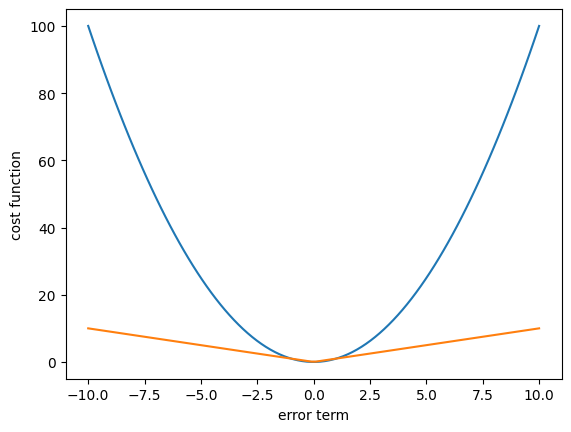

In [11]:
plt.plot(x_axis, y_mse, label='MSE')
plt.plot(x_axis, y_mae, label='MAE')
plt.xlabel('error term')
plt.ylabel('cost function')

The mean squared error (L2) is a parabolic function. Indeed the loss grows quadratically as the error increases. The parabola has a minimum when the error is zero. (symmetry around zero)

The mean absolute error (L1) is a V shaped curve. Its minimum is also in zero. For this function the loss grows at a constant rate in contrary to the mean squared error. 

#### 1.7  Are both loss functions differentiable for all $\boldsymbol{\epsilon}$? (1 point) What implications does this have for gradient based optimization like gradient descent? (1 point)

The mean squared error (L2) is differentiable everywhere but the mean absolute error is not différentiable at any error term. Indeed because of the V shaped curve, the mean absolute error is not differentiable at its minimum ${\epsilon}$ = 0. This is due to the abrupte change of slope that creates a discontinuity in the derivates. 

When the function is differentiable for any ${\epsilon}$, the gradient-based method can be used. But in the case of of the mean absolute error which is not differentiable in ${\epsilon}$ = 0, this method is more difficult to apply. 


#### 1.8 Which loss function is more sensitive to outliers (1 point) and why (1 point)?

The mean squared error (L2) is more sensitive to outliers because of the squared term. Indeed the squared error grows very fast as the error increases. Therefore large errors become very influential. On the contrary the mean absolute error grows linearly and the errors have therefore a small impact than for the L2 function. 

# 2. Regularization

Assume that the columns of $\mathbf{X}$ are linearly independent.
As a refresher of linear algebra, recall when the linear system $\mathbf{X}\mathbf{w} = \mathbf{y}$ has

#### 2.1 One unique solution (1 point)

The solution of this equation is related with the number of rows (n) and columns (m) of the marix X. To have a unique solution to this equation in the case where the columns of X are linearly independent, the number of rows n and the number of columns m need to be the same. The condition for one unique solution is n=m

#### 2.2 No solution (1 point)

This linear system has no solution when the number of equations n is greater than the number of unknowns. In other words the linear system has no solution when the number of rows is bigger than the number of columns (n > m). The system is overdetermined. 

#### 2.3 An infinite number of solutions (1 point)

The linear system has an infinite number of solutions when the number of equations n is smaller than the number of unknowns. This means that the number of rows is smaller than the number of columns (n < m). The system is underdetermined.  

To calculate the weights, $\mathbf{w}$ we have to solve
\begin{equation}
    \mathbf{w} = \left(\mathbf{\tilde{X}}\mathbf{\tilde{X}}^T\right)^{-1}\mathbf{\tilde{X}}^T\mathbf{y}
\end{equation}

#### 2.4 Will $\left(\mathbf{\tilde{X}}\mathbf{\tilde{X}}^T\right)$ be invertible if the number of features is greater than the number of data points? (1 point)

The matrix $\mathbf{\tilde{X}}$ has the dimenssions n x (m + 1) and will have linearly dependent columns.  For the inversion to be straightforward the number os rows and columns needs to be the same. On the contrary the maxtrix $\mathbf{\tilde{X}}$ is not a square matrix, $\left(\mathbf{\tilde{X}}\mathbf{\tilde{X}}^T\right)$ is not invertible. 

#### 2.5  What happens if some columns are linearly dependent? (1 point) What is the connection to feature selection? (1 point)

If some columns are linearly dependent, the information they provide is is redundant and the matrix is not invertible, which cause problems to solve the system. 

In this cas feature selection can be useful because it can help to remove redundant features, ie linearly dependant columns. This therefore helps to invert the matrix and consequently to solve the linear system. 

#### 2.6  What is the shape of the parabola as a function of $a$?

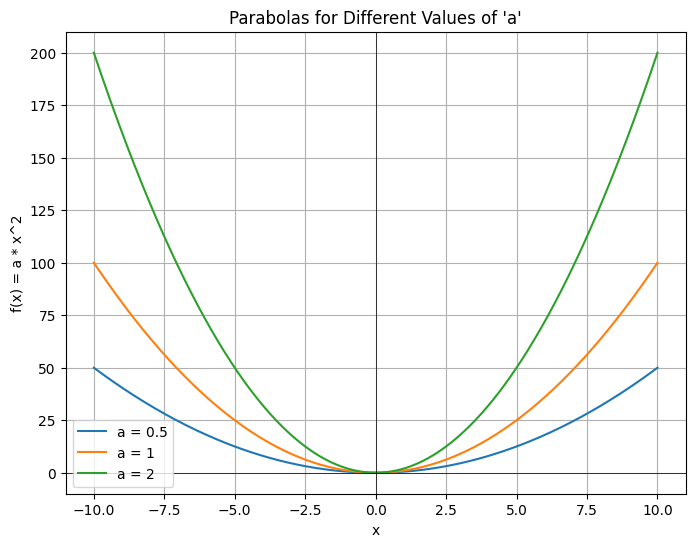

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def parabola(x, a):
    return a * x**2

x_values = np.linspace(-10, 10, 500)
a_values = [0.5, 1, 2]

plt.figure(figsize=(8, 6))
for a in a_values:
    plt.plot(x_values, parabola(x_values, a), label=f'a = {a}')

plt.title("Parabolas for Different Values of 'a'")
plt.xlabel("x")
plt.ylabel("f(x) = a * x^2")
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.legend()
plt.grid(True)
plt.show()


The graph above can be used to study the evolution of the shape of the parabola depending on the value of the parameter a. We can conclude that the parabola is wider for small values of a. In addition, the slope is smaller. Conversely, the parabola is thin for large values of a and the slope is therefore steeper. 

#### 2.7 Plot the approximation to the function for different order polynomials ($N \in \{1, 2, 16\}$) and with different regularization strength ($\lambda \in \{0, 10^{-3}, 10^{-2}, 1\}$). What do you observe 

In [22]:
def true_function(X):
    return np.cos(1.5 * np.pi * X)

In [26]:
X_test = np.linspace(0, 1, 100) # some grid for us on the x axis

In [48]:
n_samples = 10 # the number of points we will sample from true_function
degrees = [1, 2, 16] # the polynomial degrees we will test

X = np.sort(np.random.rand(n_samples))
y = true_function(X) + np.random.randn(n_samples) * 0.1 # add some scaled random noise

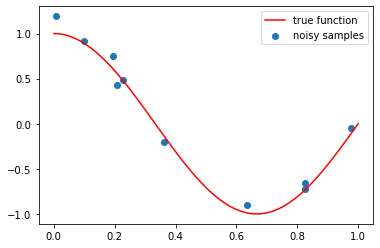

In [49]:
plt.scatter(X, y, label='noisy samples')
plt.plot(X_test, true_function(X_test), c='r', label='true function')
plt.legend()

The following code will fit a polynomial regression, you need to fill the degree

In [ ]:
polynomial_features = PolynomialFeatures(degree=#FILLEME,
                                             include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),
                     ("linear_regression", linear_regression)])
pipeline.fit(X[:, np.newaxis], y)

To plot the result, you can use the following code

In [ ]:
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="model of degree ")
plt.scatter(X, y, label='noisy samples')
plt.plot(X_test, true_function(X_test), c='r', label='true function')
plt.legend()

Next, we can investigate the effect of the regularization parameter $\lambda$ (function parameter `alpha`), For this, you can use the following code 

In [ ]:
polynomial_features = PolynomialFeatures(degree=#fillme,
                                             include_bias=False)
ridge_regression = Ridge(alpha=#fillme)
pipeline_ridge = Pipeline([("polynomial_features", polynomial_features),
                     ("ridge_regression", ridge_regression)])
pipeline_ridge.fit(X[:, np.newaxis], y)


For plotting you can reuse the following code

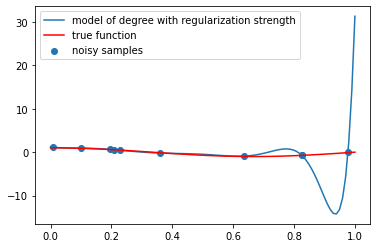

In [53]:
plt.plot(X_test, pipeline_ridge.predict(X_test[:, np.newaxis]), label="model of degree with regularization strength")
plt.scatter(X, y, label='noisy samples')
plt.plot(X_test, true_function(X_test), c='r', label='true function')
plt.legend()

#### 2.8 What do you observe if you change the number of samples from the function?

__< Your answer >__

#### 2.9 Why do we need a test set in machine learning? (1 point)

__< Your answer >__

#### 2.10 If we need to optimize hyperparameters, do we use the test set to select the best hyperparameters? (1 point)

__< Your answer >__